#Classificação e aspectos experimentais (Parte I)

Fontes da aula de hoje:
1. Capítulos 22 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

3. Várias páginas da documentação da ``scikit-learn``

3. Aula do Professor Mark Crovella (https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science/blob/master/15-Classification-II-kNN.ipynb).

4. Várias figuras e definições extraídas de https://en.wikipedia.org/wiki/Precision_and_recall, https://en.wikipedia.org/wiki/Confusion_matrix e https://en.wikipedia.org/wiki/Receiver_operating_characteristic

# Introdução

## Nosso problema de interesse

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar um modelo $f$ que aprenda dos vetores de características os rótulos.

Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$ não pertencente ao conjunto $D$ for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

## Principais desafios experimentais

1. Como avaliar um classificador? **[Aula de hoje]**
2. Como escolher bons hiperparâmetros e evitar *overfitting*?

# Questão de hoje

**Entrada:**
1. Um classificador, $C$, já treinado
2. Um conjunto de dados rotulados, $T = \{(\mathbf{x}_i, y_i)\}_{i=1}^m$, que usaremos para avaliar $C$. $T$ é chamado de conjunto de **teste**.

**Saída:**
- Um conjunto de métricas e visualizações que vão nos permitir responder a pergunta "$C$ é um bom classificador para o conjunto $T$?"

## Mudando um pouco a pergunta

Vamos começar com um caso simples, o de classificação binária. Em outras palavras, $y_i \in \{0, 1\}$.

Dizemos que o rótulo 1 é a **classe positiva** e o rótulo 0 é a **classe negativa**.

Nosso primeiro passo será usar o classificador $C$ para "prever" os rótulos de $\mathbf{x}_1, \dots, \mathbf{x}_m$.

Vamos denotar por $\hat{y}_i$ a classe predita de $\mathbf{x}_i$. Em outras palavras:
$$\hat{y}_i = C(\mathbf{x}_i).$$

Dizer se $C$ é um bom classificador em $T$ é o mesmo que dizer o quão próximo o vetor $[y_1, \dots, y_m]^T$ está de $[\hat{y}_1, \dots, \hat{y}_m]^T$.

Alguma sugestão inicial?

# Matriz de confusão

## Definição

Como $y_i \in \{0, 1\}$ e $\hat{y}_i \in \{0,1\}$, nós temos quatro possíveis situações:
1. $y_i = 1$ e $\hat{y}_i = 1$, um **positivo verdadeiro**
2. $y_i = 0$ e $\hat{y}_i = 1$, um **positivo falso**
3. $y_i = 0$ e $\hat{y}_i = 0$, um **negativo verdadeiro**
4. $y_i = 1$ e $\hat{y}_i = 0$, um **negativo falso**.

Formalizando:
1. $TP = |\{(\mathbf{x}, y) \in T: y = 1 \text{ e } C(\mathbf{x}) = 1\}|$
2. $FP = |\{(\mathbf{x}, y) \in T: y = 0 \text{ e } C(\mathbf{x}) = 1\}|$
3. $TN = |\{(\mathbf{x}, y) \in T: y = 0 \text{ e } C(\mathbf{x}) = 0\}|$
4. $FN = |\{(\mathbf{x}, y) \in T: y = 1 \text{ e } C(\mathbf{x}) = 0\}|$

É conveniente organizar essas quantidades em uma matriz para facilitar a visualização:
$$
\begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}
$$

A matriz acima é chamada de **Matriz de Confusão** e é a fonte de uma variedade rica de métricas para avaliação de classificadores.

Da [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix), temos a versão mais ilustrativa:

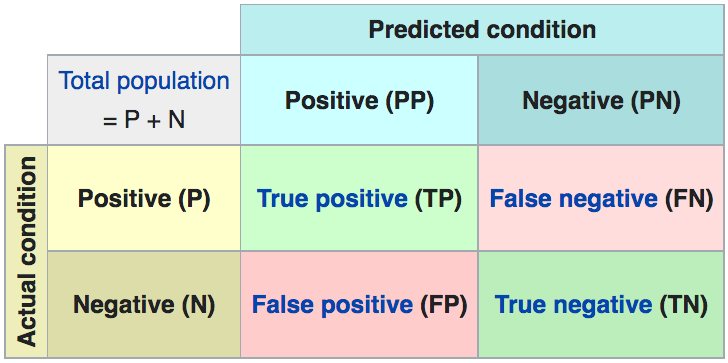

## Acurácia

Com as definições acima, podemos facilmente ver que a taxa de acerto do classificador, ou **acurácia**, é dada por:
$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}.
$$

Vejamos um exemplo.

In [ ]:
#@title
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image

from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets

X, y = datasets.make_circles(noise=.1, factor=.5, random_state=1)
#print('Shape of data: {}'.format(X.shape))
#print('Unique labels: {}'.format(np.unique(y)))

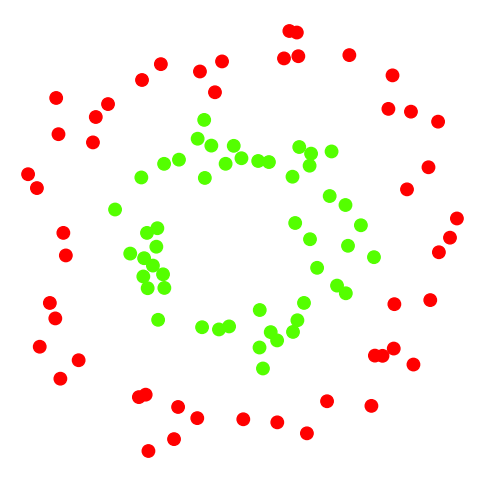

In [ ]:
#@title
plt.figure(figsize = (6,6))
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y, s = 80)
plt.axis('off')
plt.axis('equal');

Considere que uma parte do dataset foi separada para treinar um **KNN** e outra é nosso conjunto de teste. Por hoje, não precisamos nos preocupar como essa divisão é feita.

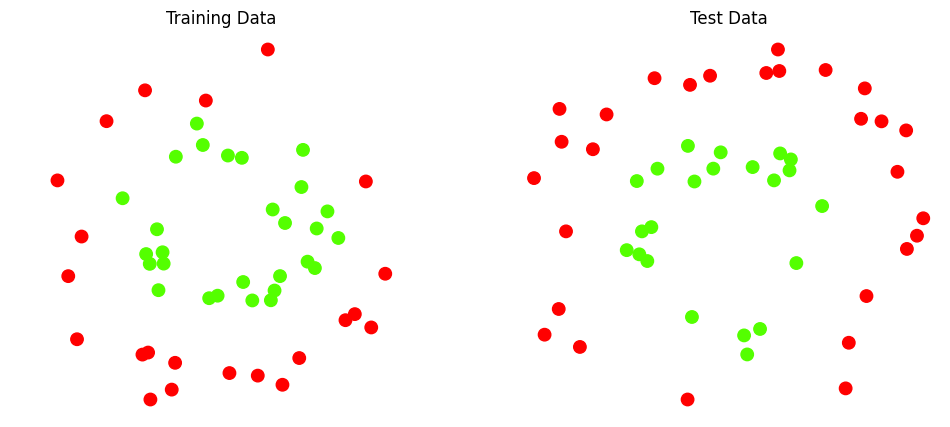

In [ ]:
#@title
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

fig_size = (12, 5)

plt.figure(figsize = fig_size)
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 80)
plt.axis('equal')
plt.axis('off')
plt.title('Training Data')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 80)
plt.title('Test Data')
plt.axis('equal')
plt.axis('off');

Treinando o classificador (Aula passada) em um conjunto de treinamento, ``X_train`` e ``y_train``.

In [ ]:
C = KNeighborsClassifier(n_neighbors = 3);
C.fit(X_train,y_train);

Predizendo os rótulos do conjunto de teste, ``X_test`` e ``y_test``.

In [ ]:
y_hat = C.predict(X_test)

Calculando a acurácia.

In [ ]:
from sklearn.metrics import accuracy_score

print('Acurácia', accuracy_score(y_test, y_hat))

Acurácia 0.92


### Visualizando a matriz de confusão

Com frequências...

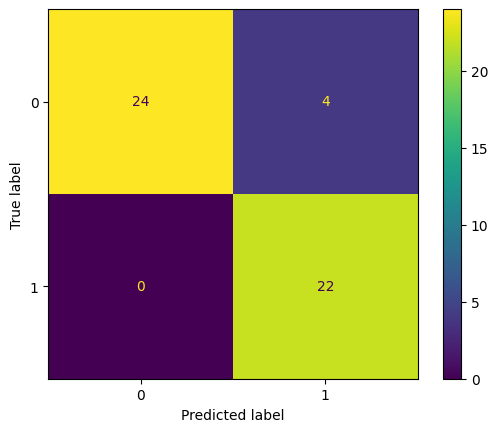

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_hat);

... e a normalizada.

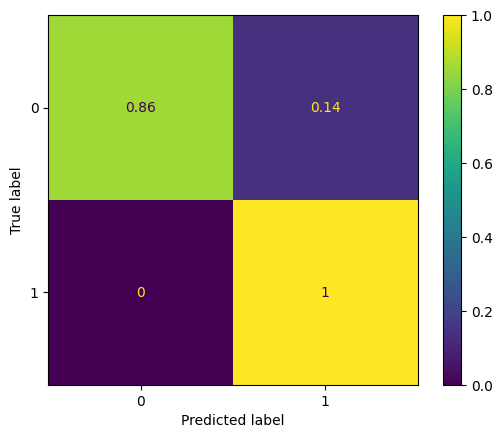

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, normalize = 'true');

### MUITO cuidado com a Acurácia!

Vejamos se vocês realmente entenderam. Suponhamos um classificador com as seguintes características:
1. A Acurácia do classificador no conjunto de teste foi **0.9**!
2. A matriz de confusão do classificador é dada abaixo

In [ ]:
#@title
import pandas as pd
x = np.array([[85, 10],[0, 5]])
mc = pd.DataFrame(x, columns = ['Predito 1', 'Predito 0'])
mc.index = ['Rótulo 1', 'Rótulo 0']
mc


,Predito 1,Predito 0
Rótulo 1,85,10
Rótulo 0,0,5


#### Esse é um bom classificador?

**Não!!!** Mas, professor, 0.9 está bem próximo de 1. Esse é um valor alto para acurácia.

- Veja que 95% dos itens sendo classificados são da classe positiva.
- Um outro classificador que "chute" que todos os itens pertencem à classe positiva já tem uma acurácia de 95%.

#### Lembrete

**MUITO CUIDADO COM A ACURÁCIA. PARA QUE ELA SEJA INFORMATIVA, DEVE-SE OBSERVAR TAMBÉM A PROPORÇÃO DE ELEMENTOS EM CADA CLASSE!!!**

## Precisão, Revocação e *F1-Score*

Para evitar a armadilha mencionada acima, precisamos de medidas auxiliares. As mais comuns são Precisão (*Precision*), revocação (*Recall*) e *F1-Score*.

Vamos começar com as definições:

1. $\text{Precision} = \frac{TP}{TP + FP}$

2. $\text{Recall} = \frac{TP}{TP + FN}$

3. $\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

### Interpretação

- A **Precisão** é a porcentagem de acertos entre todas as **predições para a classe positiva**.

- A **Revocação** é a porcentagem de acertos entre todos os **elentos da classe positiva**.

- O **F1-Score** é a média harmônica entre **precisão** e **revocação**.

As três medidas acima assumem valores entre 0 e 1. Quanto mais próximo de 1, melhor.


### Visualização

Da [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall),

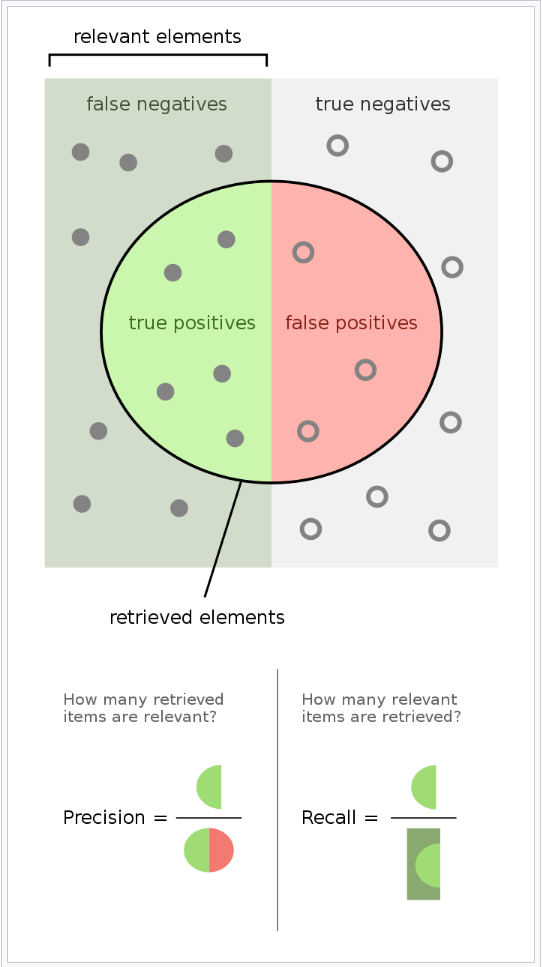

### Interpretação II

Suponham que vocês estejam vendo uma pessoa (e.g., um político) falar sobre um tema $x$.

- **Precisão:** de tudo que a pessoa falou, qual o percentual de verdades sobre $x$?
- **Revocação:** de todas as verdades sobre $x$, qual o percentual foi falado pela pessoa?

Um bom discurso sobre $x$ deve ser formado apenas por verdades (precisão) e deve conter todas as verdades (revocação).

### Na ``scikit-lean``

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
print('Precisão:', precision_score(y_test, y_hat))

Precisão: 0.8461538461538461


In [ ]:
print('Revocação:', recall_score(y_test, y_hat))

Revocação: 1.0


In [ ]:
print('F1-Score:', f1_score(y_test, y_hat))

F1-Score: 0.9166666666666666


Podemos combinar todas as medidas com [``classification_report``](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.85      1.00      0.92        22

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



## Classificadores não binários

Todas as definições acima podem ser generalizadas de forma natural para classificadores não binários (i.e., quando temos mais de duas classes). Vamos utlizar o dataset MNIST como exemplo.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns

In [ ]:
digits = datasets.load_digits(return_X_y = False)
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


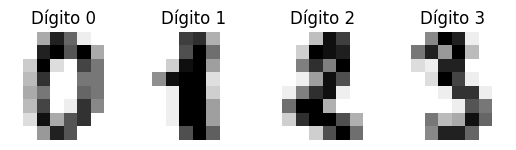

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Dígito %i' % label)

Separando uma porção para treinar o classificador e outra para testar.

In [ ]:
import sklearn.model_selection as model_selection
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

Treinando o classificador e predizendo os rótulos no conjunto de teste.

In [ ]:
C = KNeighborsClassifier(n_neighbors = 3) # 3
C.fit(X_train, y_train);
y_hat = C.predict(X_test)

Podemos proceder com a matriz de confusão normalmente (na versão de frequências ou normalizada).

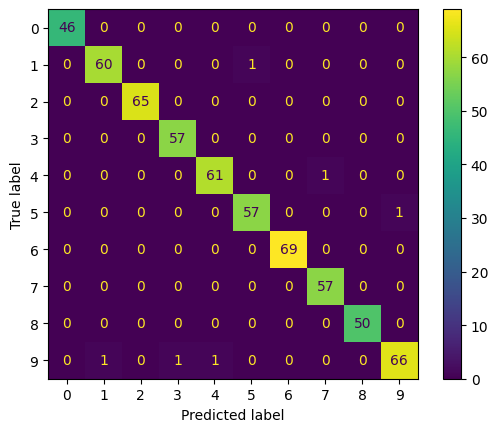

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat);

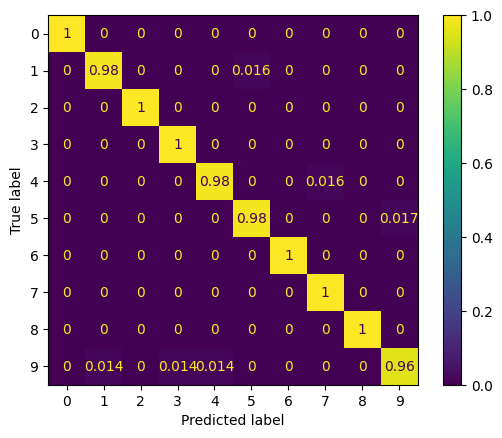

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, normalize = 'true');

E podemos analisar **precisão**, **revocação** e **F1-Score** "como se cada uma das classes fosse a classe positiva".

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      0.98      0.98        61
           2       1.00      1.00      1.00        65
           3       0.98      1.00      0.99        57
           4       0.98      0.98      0.98        62
           5       0.98      0.98      0.98        58
           6       1.00      1.00      1.00        69
           7       0.98      1.00      0.99        57
           8       1.00      1.00      1.00        50
           9       0.99      0.96      0.97        69

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



# Curva ROC e AUC

A Curava ROC (*Receiver Operating Characteristic*) e a AUC (*Area Under the Curve*) são metodologias úteis para analisar classificadores em alguns contextos específicos.

Vamos supor que:
1. Estamos com um classificador $C$ já treinado para um problema de classificação binária.
2. Para cada $\mathbf{x}$, $C$ também consegue calcular um *score* que represente a chance de $\mathbf{x}$ ser da classe positiva.

Em geral, classificadores com as propriedades acima funcionam da seguinte maneira. Um limiar $\rho$ é estabelecido e:
1. Itens com *score* maior que $\rho$ são da classe positiva
2. Itens com *score* menor ou igual a $\rho$ são da classe negativa

O KNN satisfaz os requisitos acima. Quando queremos classificar um $\mathbf{x}$ com o KNN, o classificador:
1. Calcula a fração de elementos da classe positiva entre os $k$ vizinhos mais próximos de $\mathbf{x}$
2. Se a fração acima (*score*) for maior que 0.5 ($\rho$), então a classe predita é positiva. Caso contrário, a classe predita é negativa.

A Curva ROC tenta responder a seguinte pergunta "O que acontece com o desempenho do classificador quando variamos o valor de $\rho$?"

Bom, é mais fácil mostrar um exemplo primeiro...

In [ ]:
#@title
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image

from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as datasets

X, y = datasets.make_circles(noise=.1, factor=.5, random_state=1)
#print('Shape of data: {}'.format(X.shape))
#print('Unique labels: {}'.format(np.unique(y)))

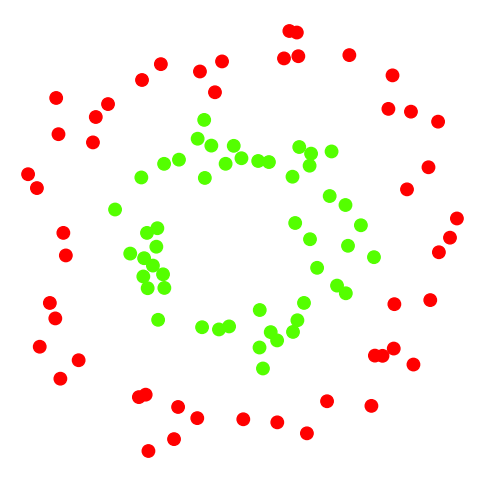

In [ ]:
#@title
plt.figure(figsize = (6,6))
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y, s = 80)
plt.axis('off')
plt.axis('equal');

Novamente, considere que uma parte do dataset foi separada para treinar um **KNN** e outra é nosso conjunto de teste. Por hoje, não precisamos nos preocupar como essa divisão é feita.

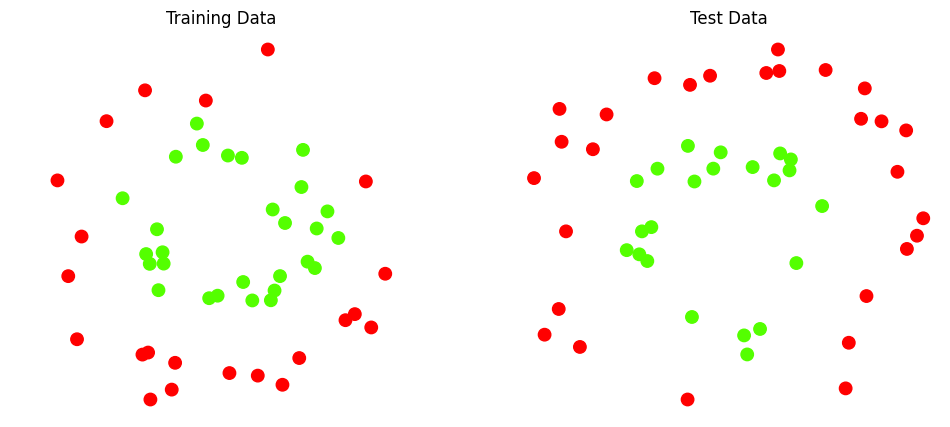

In [ ]:
#@title
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

fig_size = (12, 5)

plt.figure(figsize = fig_size)
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 80)
plt.axis('equal')
plt.axis('off')
plt.title('Training Data')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 80)
plt.title('Test Data')
plt.axis('equal')
plt.axis('off');

Treinando o classificador (Aula passada) em um conjunto de treinamento, ``X_train`` e ``y_train``.

In [ ]:
C = KNeighborsClassifier(n_neighbors = 20); # 3, 10, 20
C.fit(X_train,y_train);

Ao invés de predizer os rótulos do conjunto de teste, vamos predizer a **probabilidade** de cada item ser da classe positiva.

In [ ]:
y_proba = C.predict_proba(X_test)[:, 1].reshape(-1)

In [ ]:
y_proba

array([0.6 , 0.85, 0.65, 0.7 , 0.85, 0.7 , 0.7 , 0.55, 0.7 , 0.8 , 0.5 ,
       0.75, 0.7 , 0.6 , 0.65, 0.65, 0.75, 0.85, 0.7 , 0.65, 0.8 , 0.65,
       0.8 , 0.8 , 0.75, 0.8 , 0.7 , 0.85, 0.65, 0.75, 0.5 , 0.55, 0.75,
       0.65, 0.65, 0.85, 0.6 , 0.8 , 0.75, 0.8 , 0.75, 0.7 , 0.8 , 0.7 ,
       0.8 , 0.7 , 0.75, 0.65, 0.75, 0.5 ])

Com os rótulos reais do conjunto de teste e os *scores*, podemos fazer a Curva ROC.

Cada ponto da curva, representa uma matriz de confusão (obtida a partir de um certo limiar, $\rho$).

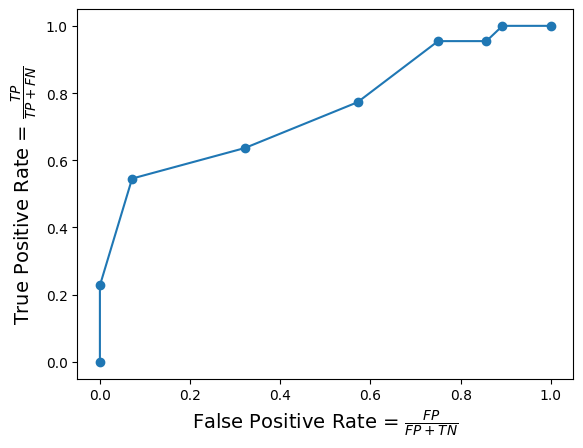

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, rhos = roc_curve(y_test, y_proba)

#print(rhos)

plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.xlabel(r'False Positive Rate = $\frac{FP}{FP+TN}$', fontsize=14)
plt.ylabel(r'True Positive Rate = $\frac{TP}{TP + FN}$', fontsize=14);

- TPR (*True Positive Rate*) é a taxa de verdadeiros positivos entre todos os elementos da classe positiva.
- FPR (*False Positive Rate*) é a taxa de falsos positivos entre todos os elementos da classe negativa.

Idealmente, queremos $TPR = 1$ e $FPR = 0$. Assim, um classificador bem treinado, deve gerar uma Curva ROC que toque o ponto (0, 1).

Quando isso ocorre, a área abaixo da curva ROC é 1. Quanto mais longe desse ponto a curva estiver, menor é a área abaixo da curva ROC e pior é o classificador.

In [ ]:
from sklearn.metrics import auc

print('AUC:', auc(fpr, tpr))

AUC: 0.9999999999999999


## Interpretação

Da [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

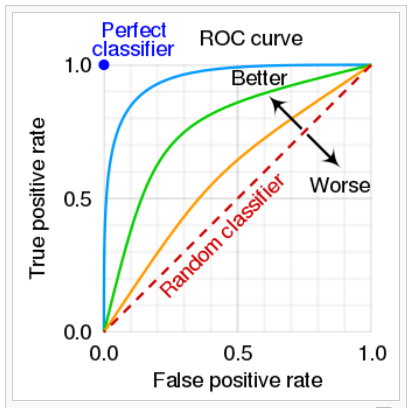

# What is next?

- Escolha de hiperparâmetros e *overfitting*
- Divisão do conjunto de dados em treino e teste.